# K-Means with library

###K-Means Clustering

 - Step1 - 각 데이터에 대해 가장 가까운 중심점을 찾고, 그 중심점에 해당하는 군집 할당
 - Step2 - 할당된 군집을 기반으로 새로운 중심 계산, 중심점은 군집 내부 점들 좌표의 평균(mean)을 계산
 - Step3 - 각 클러스터의 할당이 바뀌지 않을 때까지 반복



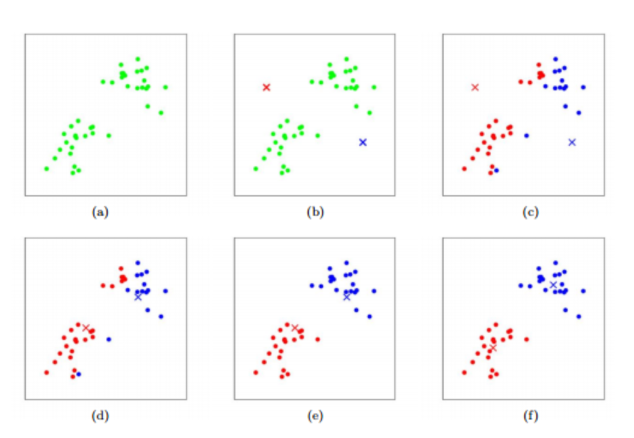

[https://www.naftaliharris.com/blog/visualizing-k-means-clustering/](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/)

In [1]:
# google drive mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# basic path 설정
basicpath = '/content/drive/MyDrive/CBNUDatascience_colab/9주차'

In [3]:
# 실습에 필요한 라이브러리 import
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [4]:
# path 설정 및 데이터 불러오기
path =os.path.join( basicpath, 'Dataset/Clustering')
file = 'input2.csv'
data = pd.read_csv(os.path.join(path, file), index_col=None)

## 데이터 확인

In [5]:
# 데이터 확인
data.head(10)


,x,y
0,40.169678,7.529327
1,15.040789,19.121220
2,12.907942,27.272168
3,44.258823,11.844700
4,32.404005,37.238491
5,11.591989,30.907491
6,29.806420,51.450404
7,30.487456,46.869026
8,19.039982,14.783329
9,10.634248,11.455458


In [6]:
x = data['x']
y = data['y']

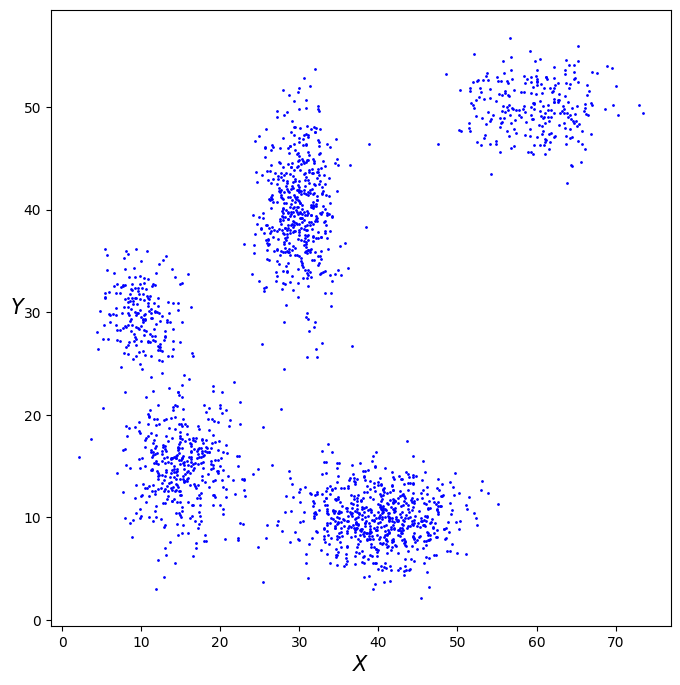

In [7]:
# matplotlib.pyplot을 사용한 데이터 시각화
plt.figure(figsize=[8, 8])
plt.scatter(x, y, s=1, c='b')
plt.xlabel("$X$", fontsize=15)
plt.ylabel("$Y$", fontsize=15, rotation=0)

plt.show()





##scikit-learn이란?

 - python을 대표하는 머신러닝 라이브러리
 - 오픈 소스로 공개되어 있어, 개인, 비즈니스 관계없이 누구나 무료로 사용가능
 - 초심자가 머신러닝을 배우기 시작할 때 적합한 라이브러리



## Scikit-learn을 통한 모델 학습

1. 라이브러리 임포트
2. 학습 데이터 준비
3. 모델 지정 및 학습 실행
4. 모델 성능 테스트
5. 필요에 따라 시각화

In [8]:
# 데이터 값 확인
data.values


array([[40.16967799,  7.52932713],
       [15.04078885, 19.12122018],
       [12.90794186, 27.27216821],
       ...,
       [62.19859004, 50.510496  ],
       [34.6629832 , 46.9132924 ],
       [30.61582825, 36.95010089]])

In [9]:
# KMeans 라이브러리 임포트
from sklearn.cluster import KMeans

In [10]:
# Kmeans 모델 지정
model = KMeans(
    n_clusters = 5,
    init = 'random',
    n_init = 10,
    max_iter = 300,
    tol = 1e-04,
    random_state = 0
)

# 학습 실행
model.fit(data.values)



KMeans(init='random', n_clusters=5, n_init=10, random_state=0)

In [11]:
model.labels_

array([1, 2, 4, ..., 0, 3, 3], dtype=int32)

## 모델 Test

In [12]:
# 모델 시각화를 위한 군집 별 색 지정

unique_labels = np.unique(model.labels_)

colors = [plt.cm.gist_rainbow(each) for each in np.linspace(0, 1, len(unique_labels))]

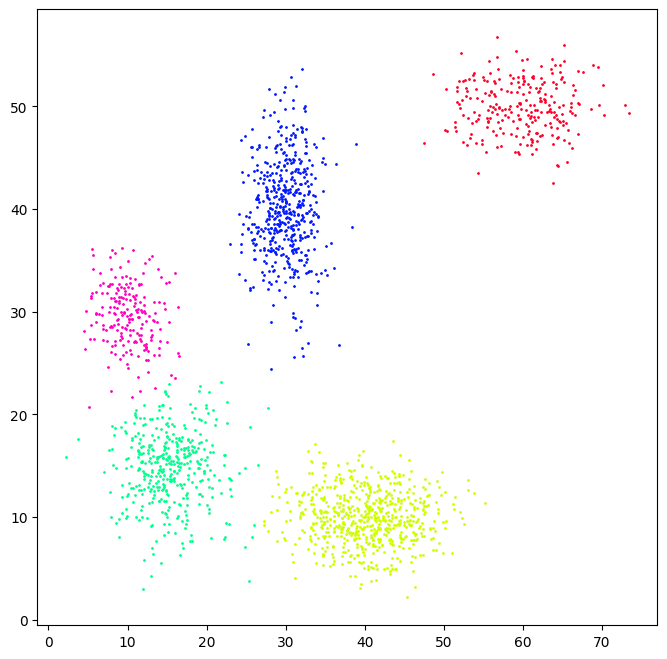

In [13]:
# 모델 시각화

plt.figure(figsize=[8, 8])
for cluster_index, col in zip(unique_labels, colors):
  class_mask = (model.labels_ == cluster_index)
  plt.plot(data.values[class_mask][:, 0],
           data.values[class_mask][:, 1],
           'o', markerfacecolor= col, markeredgecolor = col, markersize=1
           )



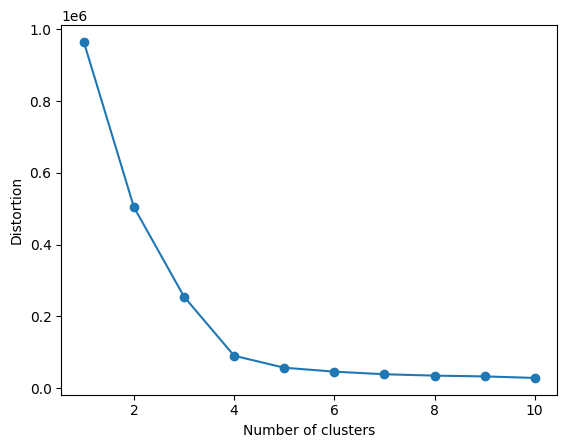

In [14]:
# 군집 내 분산을 확인하여 K를 정하는 방법 : Elbow Method

distortions = []
for i in range(1, 11):
  model = KMeans(
    n_clusters = i,
    init = 'random',
    n_init = 10,
    max_iter = 300,
    tol = 1e-04,
    random_state = 0
  )
  model.fit(data.values)
  distortions.append(model.inertia_)


# 군집 내 분산 시각화

plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()


##Text Data에 K-means Clustering 적용

In [15]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

documents = ["This little kitty came to play when I was eating at a restaurant.","hello kitty is my favorite character",
             "Merley has the best squooshy kitten belly.","Is Google translator so good?","google google",
             "google Translate app is incredible.","My dog s name is Kong","dog dog dog","cat cat",
             "If you open 100 tab in google you get a smiley face.","Kong is a very cute and lovely dog",
             "Best cat photo I've ever taken.","This is a cat house",
             "Climbing ninja cat kitty.","What's your dog's name?","Cat s paws look like jelly",
             "Impressed with google map feedback.","I want to join google","You have to wear a collar when you walk the dog",
             "Key promoter extension for google Chrome.","Google is the best company","Google researcher"]

vectorizer = TfidfVectorizer(stop_words = 'english')

vectorized_data = vectorizer.fit_transform(documents)


In [16]:
vectorized_data

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 75 stored elements and shape (22, 54)>

In [17]:
# Kmeans 모델 지정
model = KMeans(n_clusters = 3, init='k-means++', random_state=10)

# 학습 실행
model.fit(vectorized_data)


KMeans(n_clusters=3, random_state=10)

In [18]:
model.labels_


array([1, 1, 0, 0, 0, 0, 2, 2, 1, 0, 2, 1, 1, 1, 2, 1, 0, 0, 2, 0, 0, 0],
      dtype=int32)

In [19]:
[x for x, y in zip(documents, model.labels_) if y == 0]

['Merley has the best squooshy kitten belly.',
 'Is Google translator so good?',
 'google google',
 'google Translate app is incredible.',
 'If you open 100 tab in google you get a smiley face.',
 'Impressed with google map feedback.',
 'I want to join google',
 'Key promoter extension for google Chrome.',
 'Google is the best company',
 'Google researcher']

In [20]:
[x for x, y in zip(documents, model.labels_) if y == 1]

['This little kitty came to play when I was eating at a restaurant.',
 'hello kitty is my favorite character',
 'cat cat',
 "Best cat photo I've ever taken.",
 'This is a cat house',
 'Climbing ninja cat kitty.',
 'Cat s paws look like jelly']

In [21]:
[x for x, y in zip(documents, model.labels_) if y == 2]

['My dog s name is Kong',
 'dog dog dog',
 'Kong is a very cute and lovely dog',
 "What's your dog's name?",
 'You have to wear a collar when you walk the dog']

In [22]:
# 새로운 document에서 모델 test
Y = vectorizer.transform(["i want to  have a dog"])
prediction = model.predict(Y)
print(prediction)

[2]
